**This project is to classify the image using CNN**

**The CIFAR-10 dataset**

**The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. **

**The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.**

**The label data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10.**

**airplane : 0**
**automobile : 1**
**bird : 2**
**cat : 3**
**deer : 4**
**dog : 5**
**frog : 6**
**horse : 7**
**ship : 8**
**truck : 9 **

**1.** **Import the packages needed for this image Classification project**

In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

Using TensorFlow backend.


**2**.**Download the data for training and test from cifar10**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

**3**. **Shape  of the training and test data**

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**4**. **Convert the training and test data to float and make it a proper data by substrating the mean and the standard. Convert the label of training and test to one hot encoding**

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

**5**. **Create a sequential model with first two 32 filters of 3 by 3 , **

**padding paramter is added as same so that output should have the same size**,  

**kernel regrularization is done to reduce overfitting by reducing the complexity of weights, first time imput shape of the image has to be given. Activation is added so that the output became no linear so that the network can learn better and improve so that the validation loss will come down**

**Batch normalisation is a technique for improving the performance and stability of neural networks**, **and also makes more sophisticated deep learning architectures** .

**The idea is to normalise the inputs of each layer in such a way that they have a mean output** **activation of zero and standard deviation of one. This is analogous to how the inputs to networks are** **standardised.**

**Max pooling is used to reduced the number of of paramter the network has to train**.

**Dropout is randomly setting a fraction rate of input units to 0 at each update during training time**, **which helps prevent overfitting**.

**Layes are added to the neural network with 64 and 128 filters of size 3 by 3 **

In [0]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

**6**. **Image generator is used to randomly crop, rotate the shape so that you get different images which can be convolused to get the features of the image**

In [0]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

**7**. **Learing rate function is created so that initaly the gradient dicent should take bigger step to reach the botton faster but slow down as we reaches near the loss**

In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

**8**. **RMSprop Optimizer- It restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster.**
**Compile It defines the loss function, the optimizer and the metrics**.
**Fit_generator**- **Trains the model on data generated batch-by-batch by a Python generator**
**The generator is run in parallel to the model, for efficiency**

In [0]:
batch_size = 64
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=200,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/200
781/781 [==============================] - 78s 99ms/step - loss: 1.9086 - acc: 0.4196 - val_loss: 1.6782 - val_acc: 0.5318
Epoch 2/200
781/781 [==============================] - 73s 94ms/step - loss: 1.2801 - acc: 0.5874 - val_loss: 1.1493 - val_acc: 0.6467
Epoch 3/200
781/781 [==============================] - 73s 94ms/step - loss: 1.0813 - acc: 0.6502 - val_loss: 1.1463 - val_acc: 0.6675
Epoch 4/200
781/781 [==============================] - 73s 94ms/step - loss: 0.9783 - acc: 0.6909 - val_loss: 0.8536 - val_acc: 0.7418
Epoch 5/200
781/781 [==============================] - 74s 94ms/step - loss: 0.9143 - acc: 0.7125 - val_loss: 0.8185 - val_acc: 0.7581
Epoch 6/200
781/781 [==============================] - 71s 91ms/step - loss: 0.8618 - acc: 0.7359 - val_loss: 0.8578 - val_acc: 0.7437
Epoch 7/200
781/781 [==============================] - 75s 96ms/step - loss: 0.8255 - acc: 0.7481 - val_loss: 0.7769 - val_acc: 0.7754
Epoch 8/200
781/781 [==============================] - 

**9**. **Evaluate the model for test and print the result**

In [0]:
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 2s 161us/step

Test result: 89.140 loss: 0.435


**10**. **Import the packages need to show the graph**

In [0]:
from matplotlib import pyplot
from scipy.misc import toimage
import keras as tf
from keras.models import model_from_json

**11**. **Create a function to show the images (4 in each row)**

In [0]:
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()

**12**. **Show the image of first 16 animals, store the model and predict the animals by printing the name**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


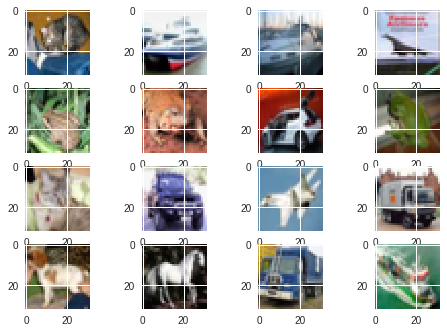

['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship']


In [0]:
show_imgs(x_test[:16])
 
# Load trained CNN model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model.h5')
 
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:16]),1)
print ([labels[x] for x in indices])